# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd

# Importing Dataset

In [2]:
df= pd.read_csv('heart.csv')
df1= pd.read_csv('o2Saturation.csv')

About Dataset

Age : Age of the patient

Sex: The person’s sex (1 = male, 0 = female)

cp: chest pain type

— Value 0: asymptomatic

— Value 1: atypical angina

— Value 2: non-anginal pain

— Value 3: typical angina

trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

chol: The person’s cholesterol measurement in mg/dl

fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: resting electrocardiographic results

— Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria

— Value 1: normal

— Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

thalach: The person’s maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

ca: The number of major vessels (0–3)

thal: A blood disorder called thalassemia
Results of the blood flow observed via the radioactive dye.

Value 0: NULL (dropped from the dataset previously

Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow

Value 3: reversible defect (a blood flow is observed but it is not normal)

target: Heart disease (1 = no, 0= yes)

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df1.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [5]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Data PreProcessing

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

# Exploratory Data Analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 

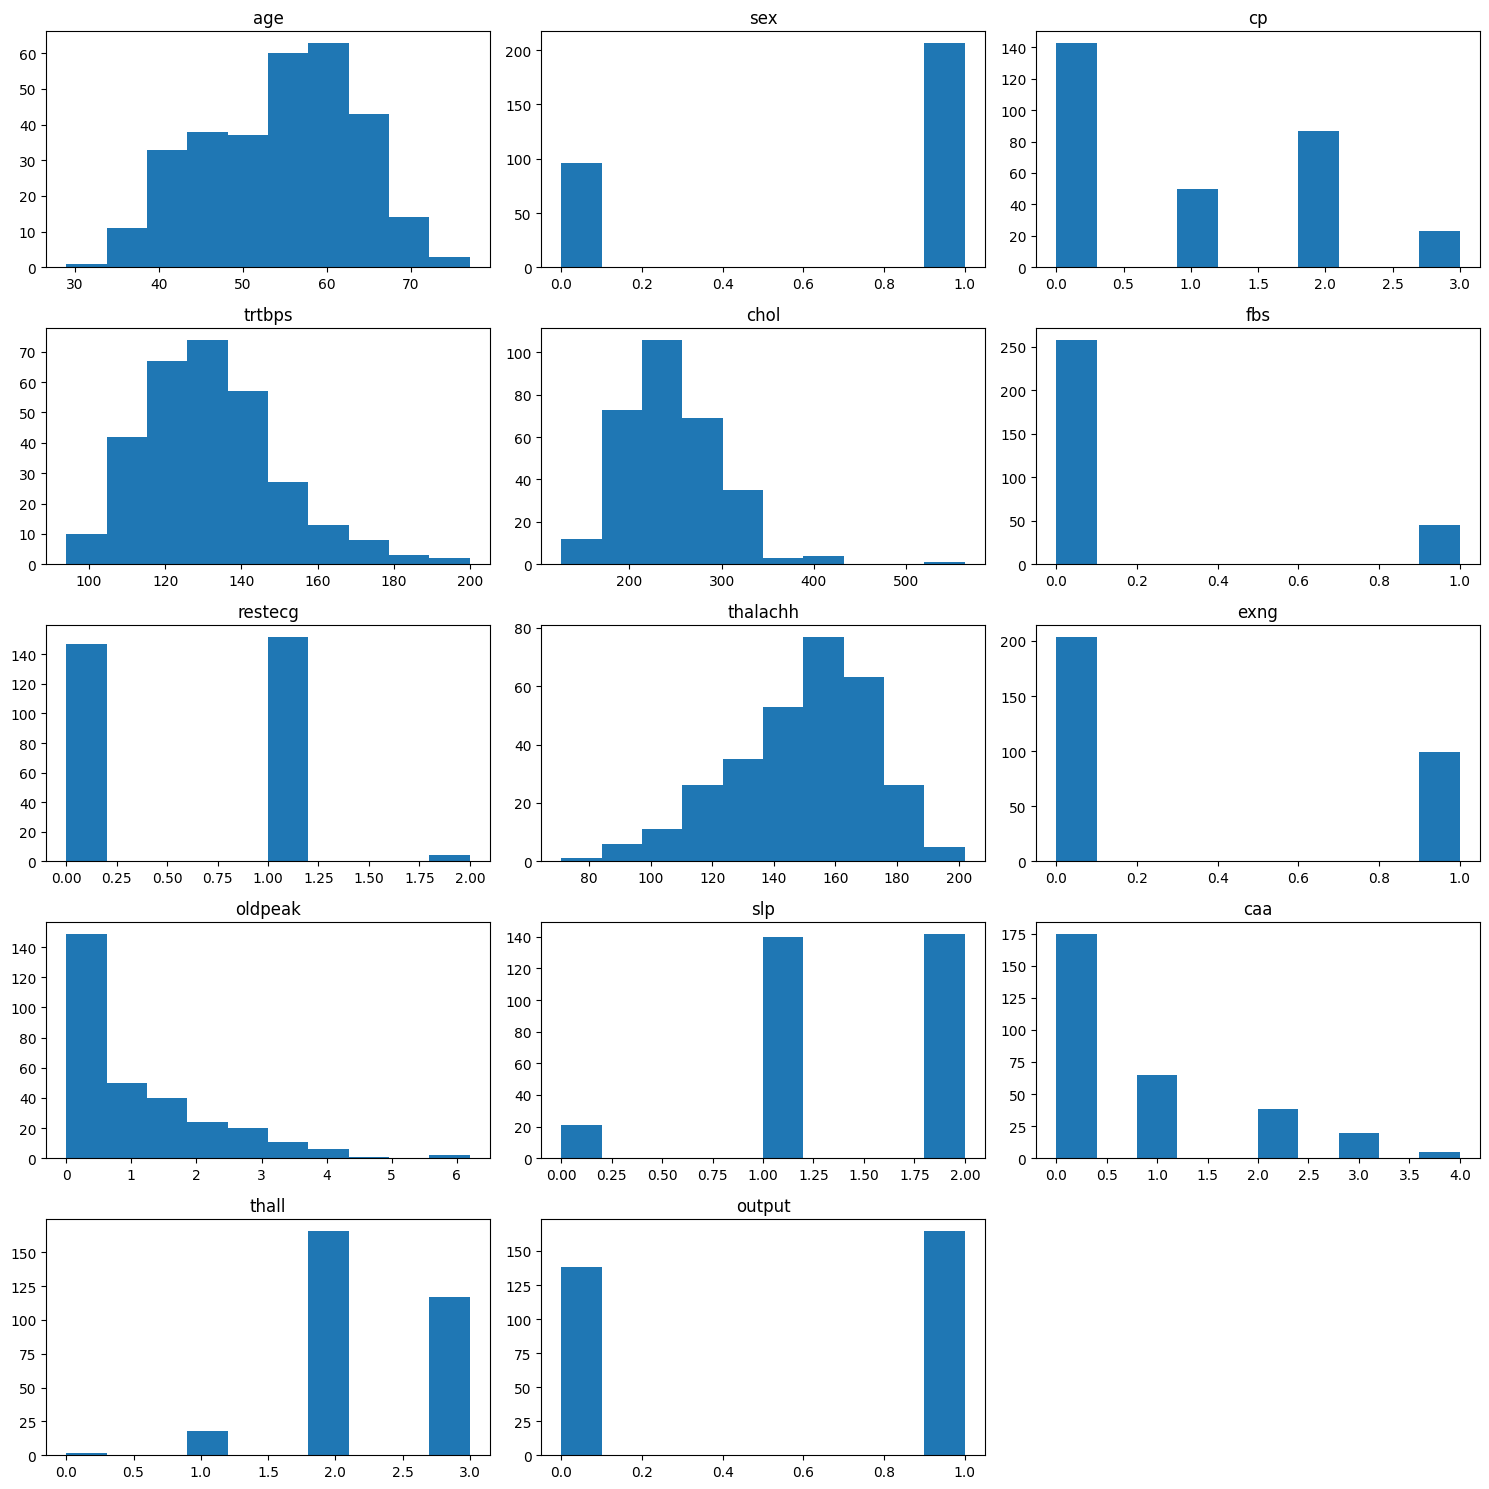

In [11]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    # Plot a histogram of the feature in the current subplot
    axs[i].hist(df[feature])
    axs[i].set_title(feature)
fig.delaxes(axs[-1])

# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

# Outlier Analysis

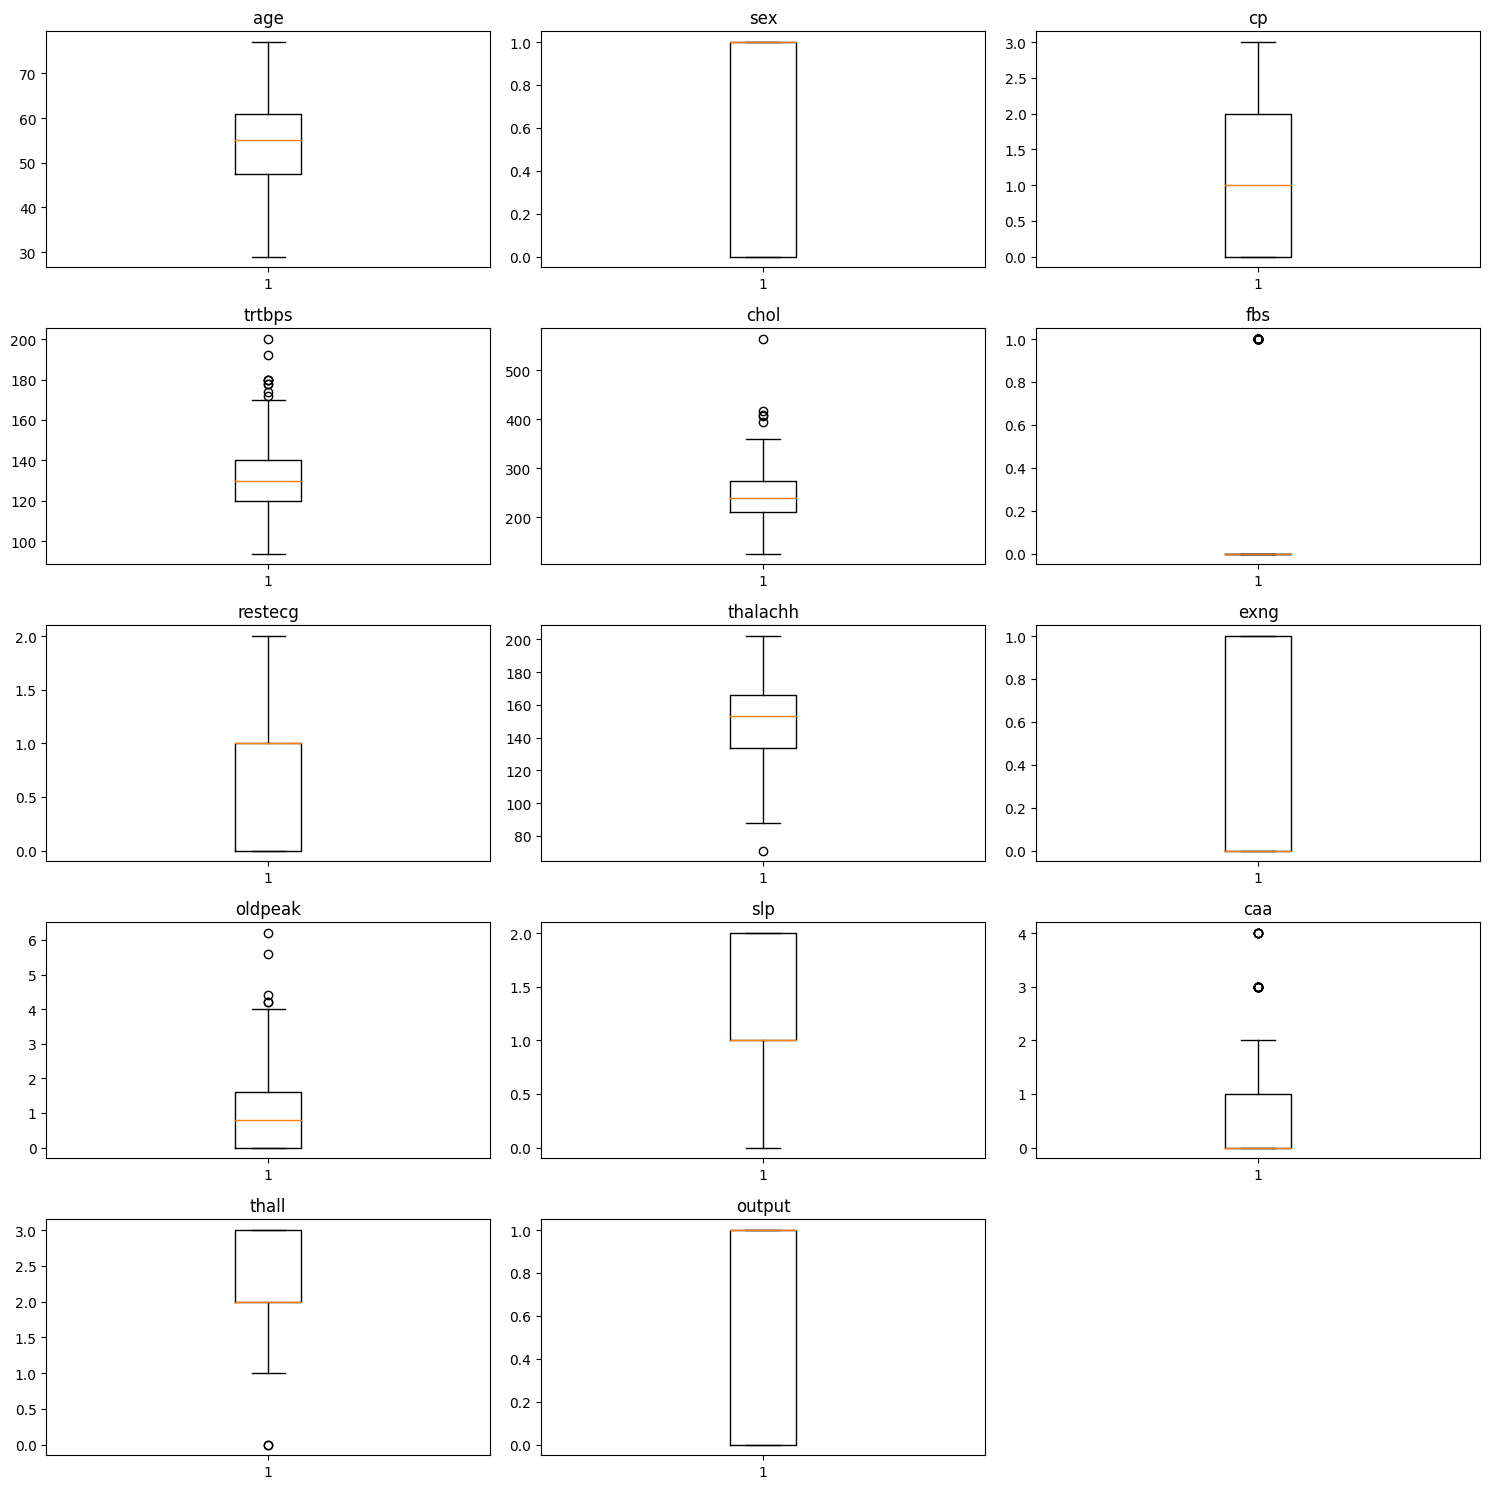

In [12]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

In [13]:
features=['trtbps', 'chol', 'oldpeak' ,'caa']
for i in features:
    #lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    #df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  trtbps
Skewness value:  -0.1352012741271468


Feature:  chol
Skewness value:  -0.09844908240560264


Feature:  oldpeak
Skewness value:  0.6346192009549019


Feature:  caa
Skewness value:  0.7698708300037694




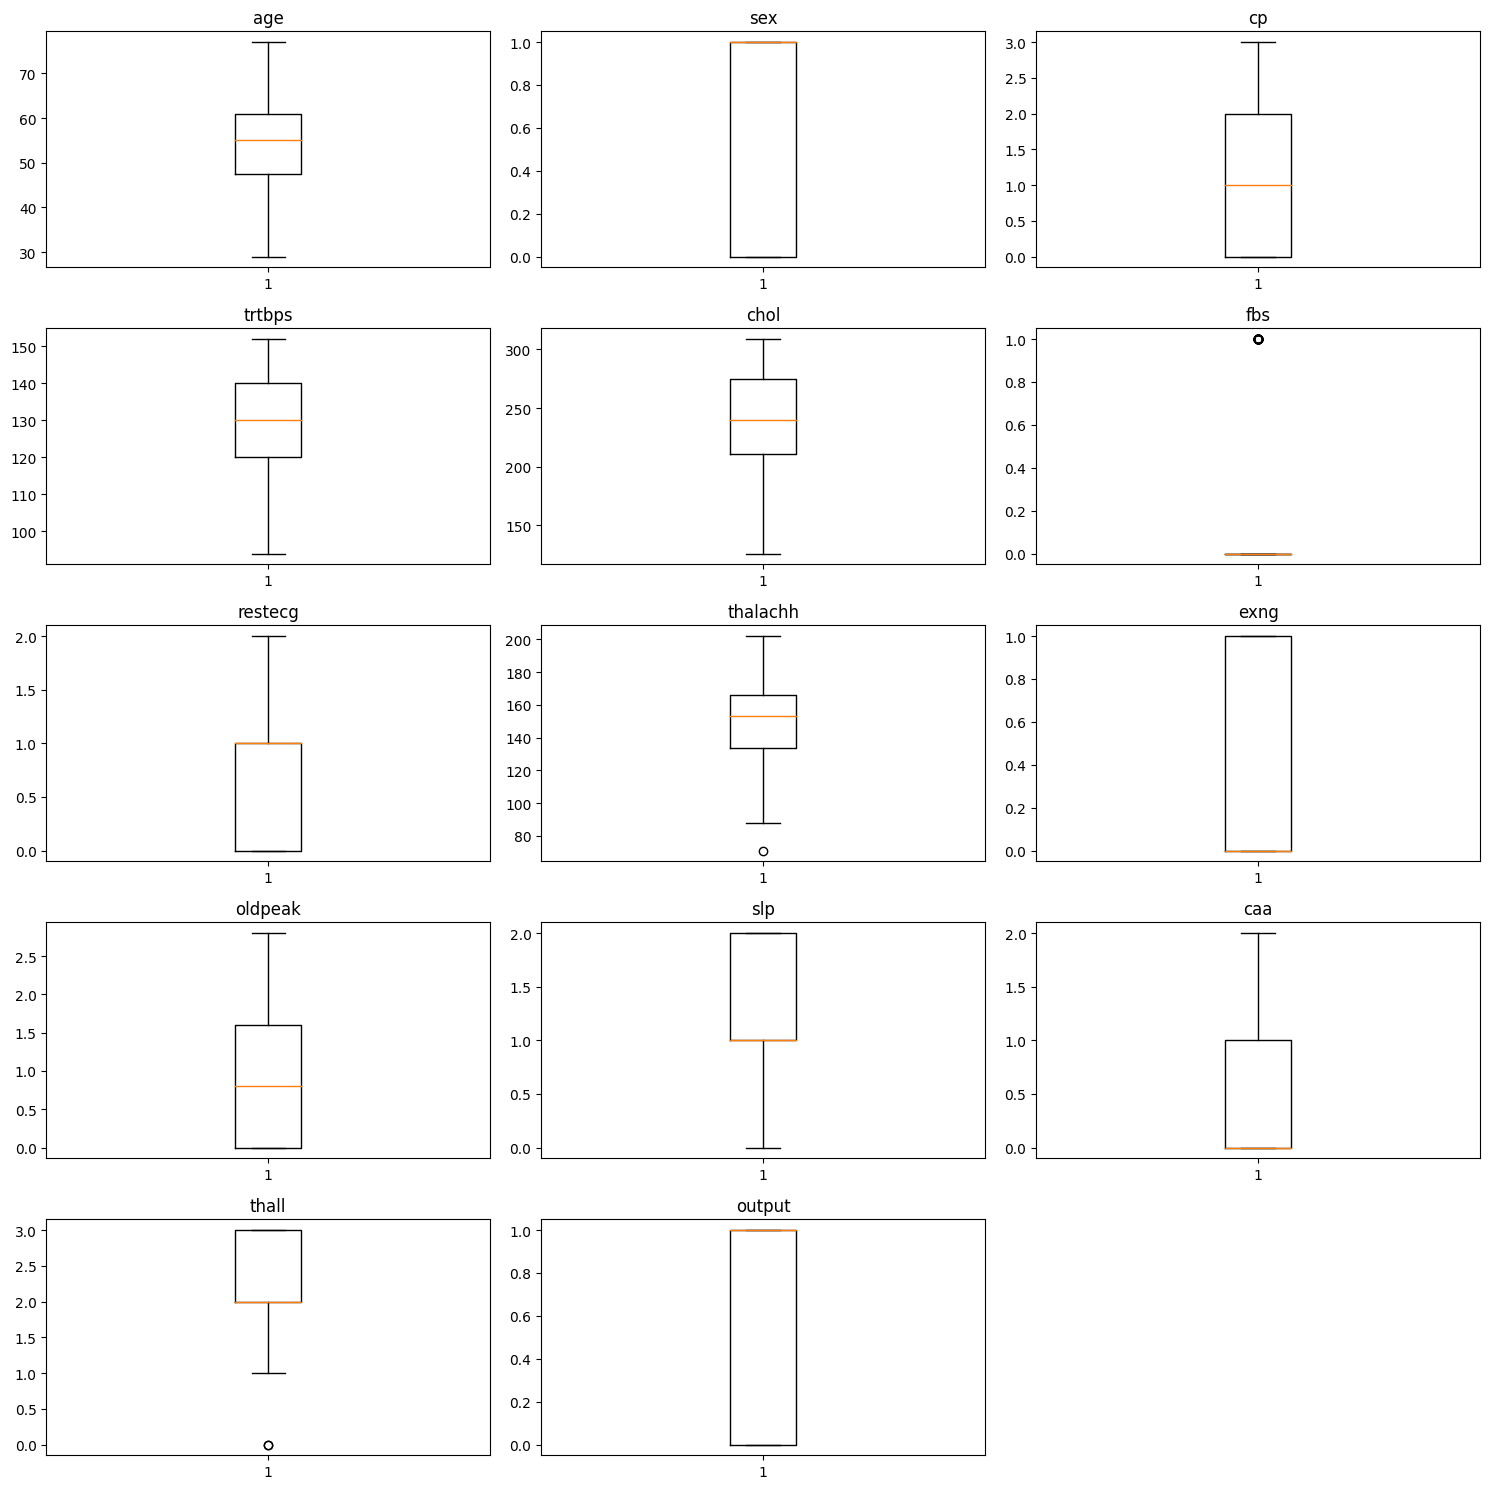

In [14]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    
    axs[i].boxplot(df[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure; here removing last grid--> 12th grid since we only have 11 numerical features
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

# Bivariate Analysis
Since we have continous numerical as well as categorical numerical values, we will analyse it separately with the target output to identify the relationship

## Analyzing Categorical Numerical values  : 

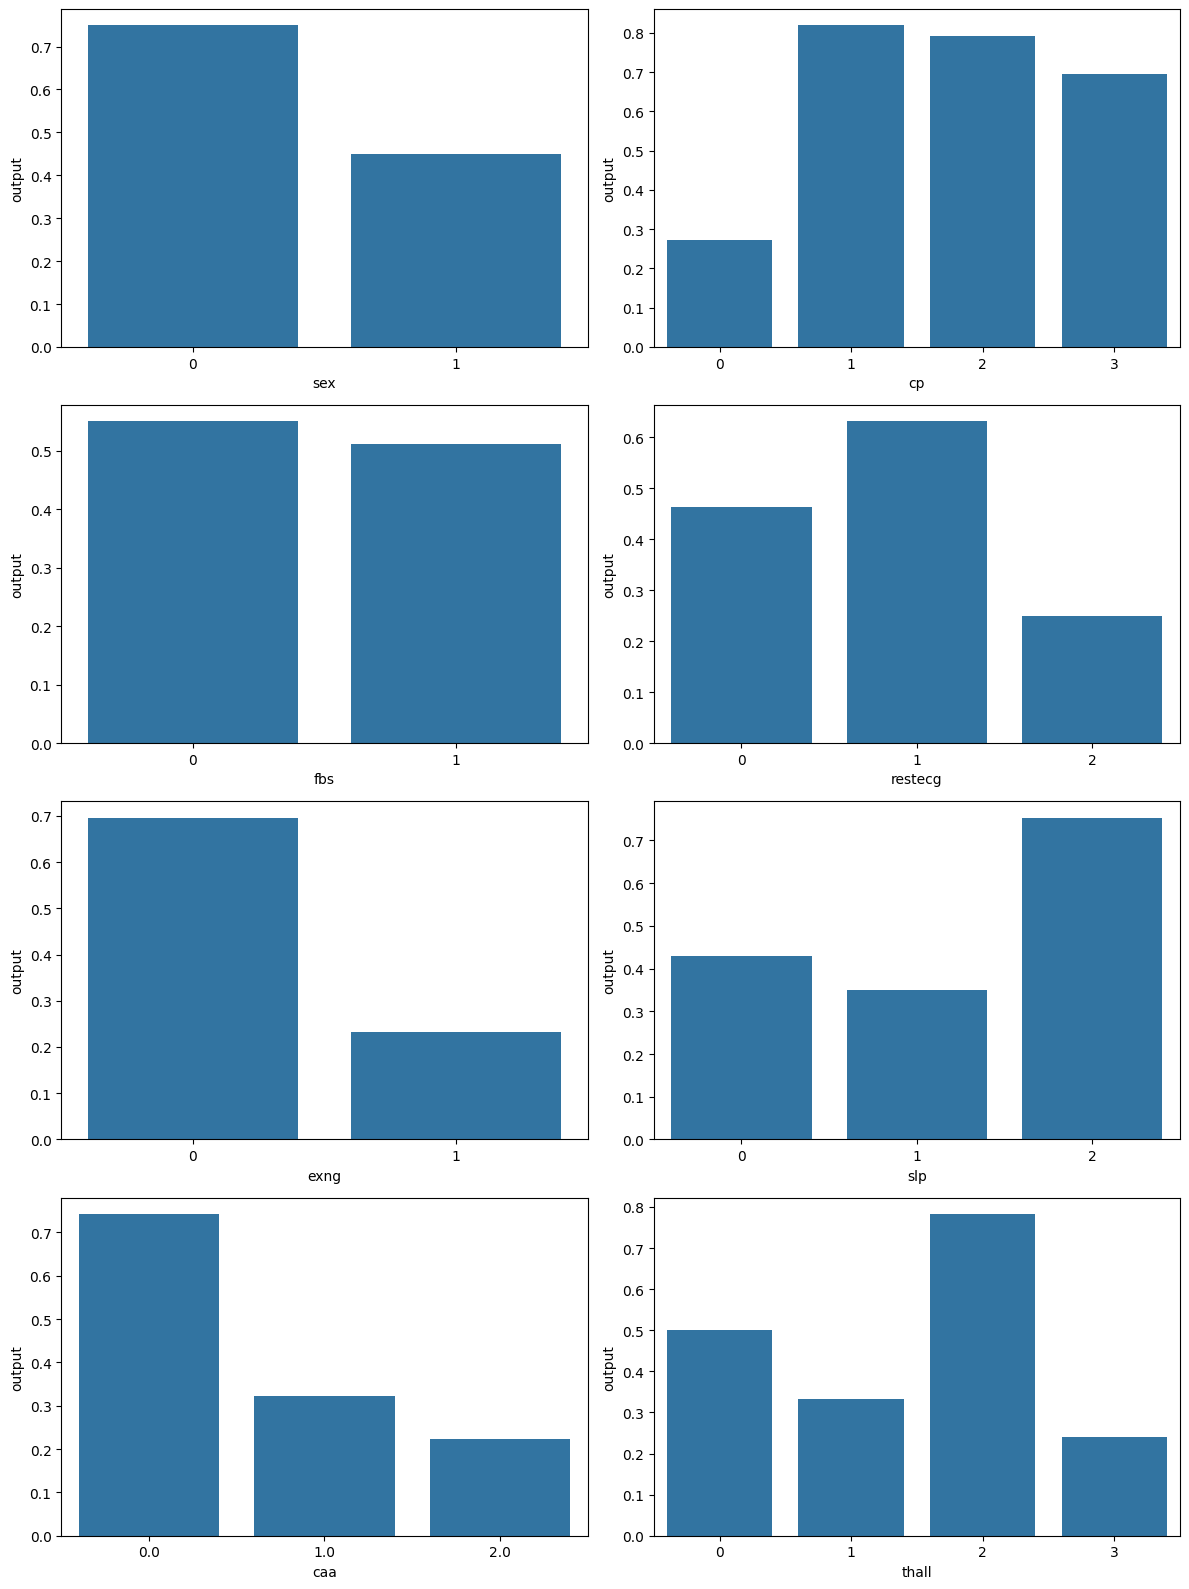

In [15]:
#categorical numerical variables
cat = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.ravel()

# Loop through each column in cat
for i, col in enumerate(cat):
    sns.barplot(x=col, y='output', data=df, ax=axs[i], errorbar=None)

plt.tight_layout()
plt.show()


## Analyzing Continous Numerical values

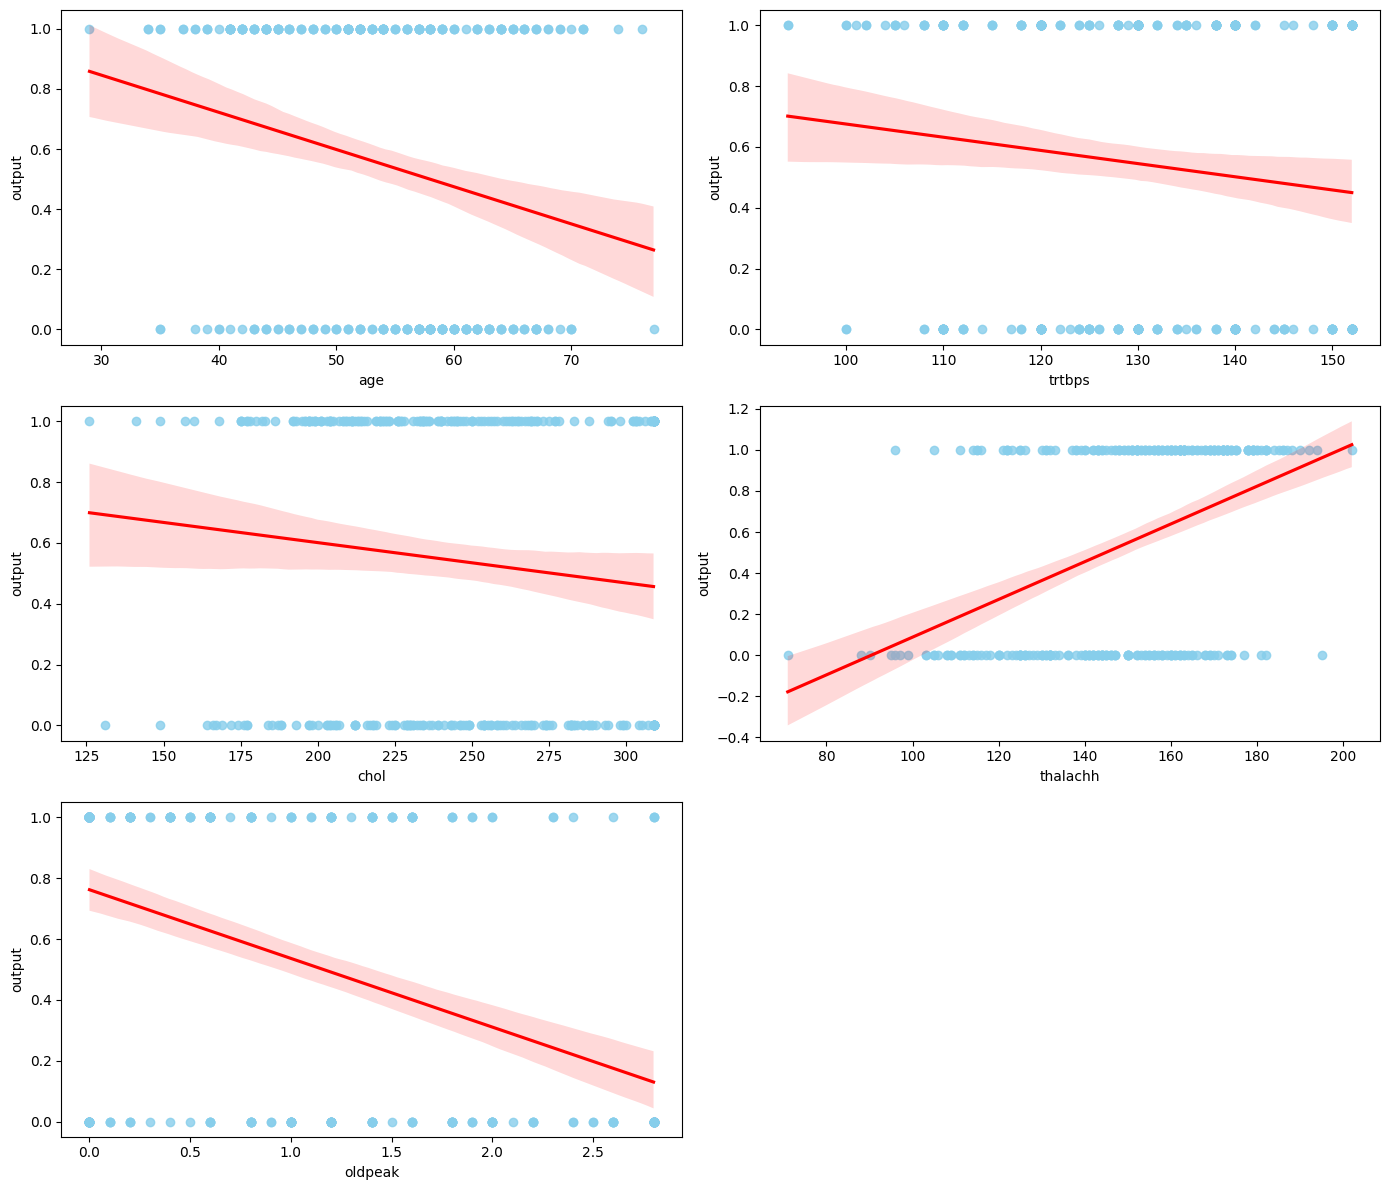

In [16]:
# Bivariate analysis of continuous numerical variables against output
bi_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

fig, axs = plt.subplots(3, 2, figsize=(14, 12))
axs = axs.ravel()

# Plot the regression for each feature
for i, col in enumerate(bi_num):
    sns.regplot(x=col, y='output', data=df, ax=axs[i], color='black', 
                scatter_kws={"color": "skyblue"}, line_kws={"color": "red"}, ci=95)

# Remove the extra subplot
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


# Correlation Matrix with Heatmap 
Correlation indicates how the features are related to each other or to the target variable.

Correlation can be positive (increase in one value, the value of the objective variable increases) or negative (increase in one value, the value of the target variable decreased).

<AxesSubplot: >

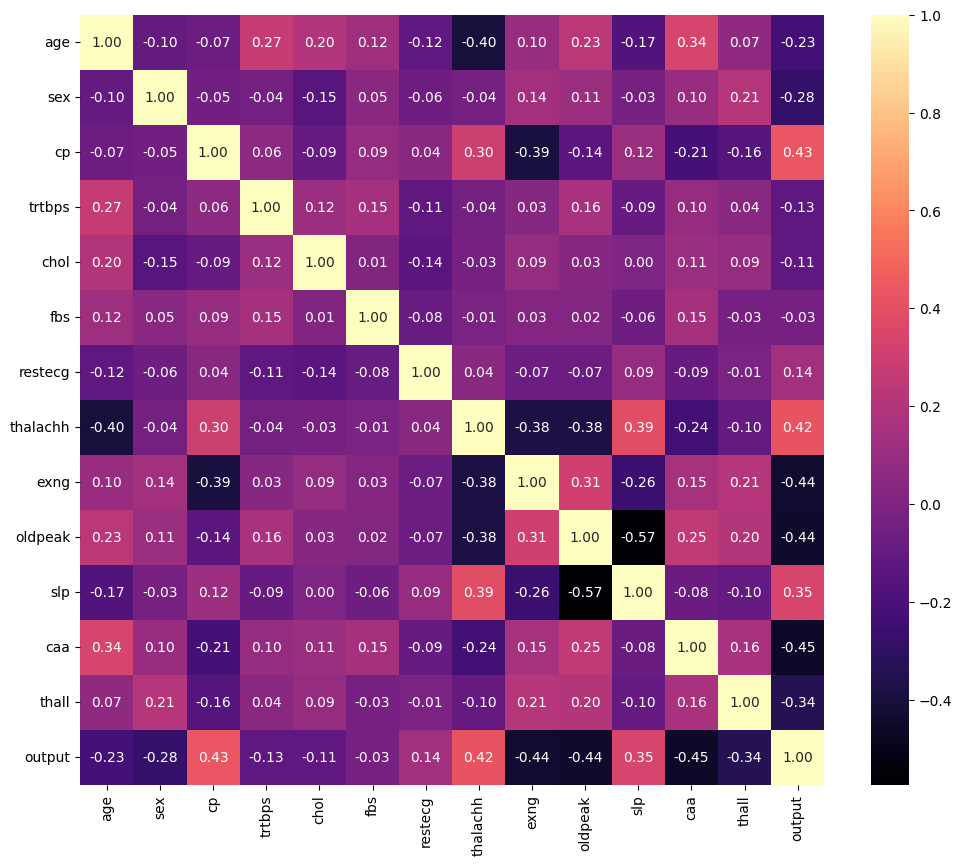

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. Compared to relation between other two variables we can say that chest pain contributes the most in prediction of presences of a heart disease. Medical emergency is a heart attack. A cardiac occurs usually when blood clot blocks blood flow to the cardiac. Tissue loses oxygen without blood and dies causing chest pain.

# Feature Selection


### __Chi-Square Statistic__:

This value indicates how much the observed data deviates from the expected data under the assumption of independence. A larger value suggests that the feature is more dependent on the target variable (i.e., it has more predictive power).

Using Chisquare Method to find top 10 best features : 

In [28]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

data = df.copy()

# Split data into features (X) and target (y)
features  = data.iloc[:, 0:13]  # Independent columns (features)
target = data.iloc[:, -1]    # Target column (e.g., price range)

# Apply SelectKBest to extract top 10 best features using Chi-Square
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(features , target)

# Create a DataFrame with feature names and their corresponding Chi-Square scores
featureScores = pd.DataFrame({
    'Feature': features.columns,
    'Chi-Square Score': fit.scores_
})

# Sort the DataFrame by score in descending order to get the best features
top_features = featureScores.nlargest(12, 'Chi-Square Score')

# Display the top 12 features
print(top_features)

     Feature  Chi-Square Score
7   thalachh        188.320472
11       caa         63.880835
2         cp         62.598098
9    oldpeak         58.459547
8       exng         38.914377
4       chol         29.182680
0        age         23.286624
10       slp          9.804095
1        sex          7.576835
3     trtbps          7.535041
12     thall          5.791853
6    restecg          2.978271


### __Mutual Information__:

Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target? 

It is equal to zero if and only if two random variables are independent ,and higher values mean higher dependency

In [37]:
X= df.drop('output',axis=1)
y= df.output

#using mutual_info_classif for classification problem MI
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

cp          0.143856
thall       0.134881
exng        0.120502
caa         0.119602
thalachh    0.096772
oldpeak     0.074287
chol        0.072559
slp         0.059926
fbs         0.024223
sex         0.013681
trtbps      0.011619
age         0.003080
restecg     0.000000
Name: MI Scores, dtype: float64

cp, thall, exng, and thalachh are the top 5 features which are dependant with output feature.

age, trtbps and restecg does not have any dependancy.

We'll train and test with top 6 features and test the accuracy and then with all the features and test the accuracy and auc score